In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import pandas as pd
%matplotlib inline
import mplsettings

from datetime import timedelta

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version : ", xr.__version__)

numpy version  :  1.23.5
pandas version :  2.0.0
xarray version :  2023.4.2


In [3]:
#sns.set_style('white')
#sns.set_context('paper', font_scale=3)
#sns.set_palette('hls', 6)
#sns.set_style('ticks')

In [4]:
dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [5]:
# CM4.0
dir_001 = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"
dir_002 = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_historical/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"
dir_003 = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_1pctCO2_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"

# CM4.0 piControl with CM4X albedo. compare to 001 
dir_425 = "/archive/Bill.Hurlin/xanadu_mom6_20220703/CM4_piControl_C/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"

# CM4Xp25 piControl: use years 0-100
dir_210 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p25_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"

# CM4Xp25 piControl: use years 101-360
dir_230 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"

# CM4Xp25 piControl: use years 360-1050
dir_306 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel22-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"

# CM4Xp25 historical and SSP 
dir_231 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"
dir_232 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"


# CM4Xp125 piControl: use years 0-100
dir_209 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210706/CM4_piControl_c192_OM4p125_v7/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"

# CM4Xp125 piControl: use years 101-455
dir_313 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_piControl_c192_OM4p125_v8/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"

# CM4Xp125 piControl: use years beyond 455
dir_437 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20241030/CM4_piControl_c192_OM4p125_v8followup/gfdl.ncrc5-intel23-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"

# CM4Xp125 historical on C4 machine 
dir_233 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p125/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_scalar_annual/ts/annual/10yr"

# CM4Xp125 historical on C4 machine 
dir_255 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"

# CM4Xp125 ssp  
dir_293 = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_ssp585_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr"

# CM2.5 and CM2.6
dir_cm25 = "/net/smg/documents/OMDT/analysis_CM2p5/CM2.5_A_Control-1860_Y02/temp_global_ave"
dir_cm26 = "/net/smg/documents/OMDT/analysis_CM2p6/1860/ocean_scalars"

In [6]:
fname_001 = dir_001+"/ocean_scalar_annual.*.thetaoga.nc"
fname_002 = dir_002+"/ocean_scalar_annual.*.thetaoga.nc"
fname_003 = dir_003+"/ocean_scalar_annual.*.thetaoga.nc"
fname_209 = dir_209+"/ocean_scalar_annual.*.thetaoga.nc"
fname_210 = dir_210+"/ocean_scalar_annual.*.thetaoga.nc"
fname_230 = dir_230+"/ocean_scalar_annual.*.thetaoga.nc"
fname_231 = dir_231+"/ocean_scalar_annual.*.thetaoga.nc"
fname_232 = dir_232+"/ocean_scalar_annual.*.thetaoga.nc"
fname_233 = dir_233+"/ocean_scalar_annual.*.thetaoga.nc"
fname_255 = dir_255+"/ocean_scalar_annual.*.thetaoga.nc"
fname_293 = dir_293+"/ocean_scalar_annual.*.thetaoga.nc"
fname_306 = dir_306+"/ocean_scalar_annual.*.thetaoga.nc"
fname_313 = dir_313+"/ocean_scalar_annual.*.thetaoga.nc"
fname_425 = dir_425+"/ocean_scalar_annual.*.thetaoga.nc"
fname_437 = dir_437+"/ocean_scalar_annual.*.thetaoga.nc"

fname_cm25 = dir_cm25+"/ocean_scalar.*.temp_global_ave.nc"
fname_cm26 = dir_cm26+"/ocean_scalar.*.temp_global_ave.nc"

In [7]:
fname_001

'/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_scalar_annual/ts/annual/5yr/ocean_scalar_annual.*.thetaoga.nc'

In [8]:
ds_001 = xr.open_mfdataset(fname_001, use_cftime = True)
ds_002 = xr.open_mfdataset(fname_002, use_cftime = True)
ds_003 = xr.open_mfdataset(fname_003, use_cftime = True)
ds_209 = xr.open_mfdataset(fname_209, use_cftime = True)
ds_210 = xr.open_mfdataset(fname_210, use_cftime = True)
ds_230 = xr.open_mfdataset(fname_230, use_cftime = True)
ds_231 = xr.open_mfdataset(fname_231, use_cftime = True)
ds_232 = xr.open_mfdataset(fname_232, use_cftime = True)
ds_233 = xr.open_mfdataset(fname_233, use_cftime = True)
ds_255 = xr.open_mfdataset(fname_255, use_cftime = True)
ds_293 = xr.open_mfdataset(fname_293, use_cftime = True)
ds_306 = xr.open_mfdataset(fname_306, use_cftime = True)
ds_313 = xr.open_mfdataset(fname_313, use_cftime = True)
ds_425 = xr.open_mfdataset(fname_425, use_cftime = True)
ds_437 = xr.open_mfdataset(fname_437, use_cftime = True)

ds_cm25 = xr.open_mfdataset(fname_cm25, use_cftime = True)
ds_cm26 = xr.open_mfdataset(fname_cm26, use_cftime = True)

In [9]:
thetaoga_001 = ds_001['thetaoga']
thetaoga_002 = ds_002['thetaoga']
thetaoga_003 = ds_003['thetaoga']
thetaoga_209 = ds_209['thetaoga']
thetaoga_210 = ds_210['thetaoga']
thetaoga_230 = ds_230['thetaoga']
thetaoga_231 = ds_231['thetaoga']
thetaoga_232 = ds_232['thetaoga']
thetaoga_233 = ds_233['thetaoga']
thetaoga_255 = ds_255['thetaoga']
thetaoga_293 = ds_293['thetaoga']
thetaoga_306 = ds_306['thetaoga']
thetaoga_313 = ds_313['thetaoga']
thetaoga_425 = ds_425['thetaoga']
thetaoga_437 = ds_437['thetaoga']

thetaoga_cm25 = ds_cm25['temp_global_ave'][:,0]
thetaoga_cm26 = ds_cm26['temp_global_ave'][:,0]

# simpler time axis to use just the year 

#thetaoga_001['year'] = thetaoga_001['time'].dt.year + 1749
thetaoga_001['year'] = thetaoga_001['time'].dt.year
thetaoga_001         = thetaoga_001.swap_dims({'time':'year'})

thetaoga_425['year'] = thetaoga_425['time'].dt.year
thetaoga_425         = thetaoga_425.swap_dims({'time':'year'})

thetaoga_002['year'] = thetaoga_002['time'].dt.year 
thetaoga_002         = thetaoga_002.swap_dims({'time':'year'})

thetaoga_003['year'] = thetaoga_003['time'].dt.year 
thetaoga_003         = thetaoga_003.swap_dims({'time':'year'})

#thetaoga_209['year'] = thetaoga_209['time'].dt.year + 1749
thetaoga_209['year'] = thetaoga_209['time'].dt.year 
thetaoga_209         = thetaoga_209.swap_dims({'time':'year'})

#thetaoga_210['year'] = thetaoga_210['time'].dt.year + 1749
thetaoga_210['year'] = thetaoga_210['time'].dt.year 
thetaoga_210         = thetaoga_210.swap_dims({'time':'year'})

#thetaoga_230['year'] = thetaoga_230['time'].dt.year + 1749
thetaoga_230['year'] = thetaoga_230['time'].dt.year 
thetaoga_230         = thetaoga_230.swap_dims({'time':'year'})

thetaoga_231['year'] = thetaoga_231['time'].dt.year
thetaoga_231         = thetaoga_231.swap_dims({'time':'year'})

thetaoga_232['year'] = thetaoga_232['time'].dt.year
thetaoga_232         = thetaoga_232.swap_dims({'time':'year'})

thetaoga_233['year'] = thetaoga_233['time'].dt.year
thetaoga_233         = thetaoga_233.swap_dims({'time':'year'})

thetaoga_255['year'] = thetaoga_255['time'].dt.year
thetaoga_255         = thetaoga_255.swap_dims({'time':'year'})

thetaoga_293['year'] = thetaoga_293['time'].dt.year
thetaoga_293         = thetaoga_293.swap_dims({'time':'year'})

#thetaoga_306['year'] = thetaoga_306['time'].dt.year + 1749
thetaoga_306['year'] = thetaoga_306['time'].dt.year
thetaoga_306         = thetaoga_306.swap_dims({'time':'year'})

thetaoga_313['year'] = thetaoga_313['time'].dt.year
thetaoga_313         = thetaoga_313.swap_dims({'time':'year'})

thetaoga_437['year'] = thetaoga_437['time'].dt.year
thetaoga_437         = thetaoga_437.swap_dims({'time':'year'})

thetaoga_231_232 = xr.concat([thetaoga_231,thetaoga_232],dim="year")
thetaoga_210_230 = xr.concat([thetaoga_210[0:100],thetaoga_230],dim="year")
thetaoga_210_230_306 = xr.concat([thetaoga_210_230,thetaoga_306],dim="year")
thetaoga_209_313 = xr.concat([thetaoga_209[0:100],thetaoga_313],dim="year")
thetaoga_209_313_437 = xr.concat([thetaoga_209[0:100],thetaoga_313,thetaoga_437],dim="year")

thetaoga_002_003 = xr.concat([thetaoga_002,thetaoga_003],dim="year")
thetaoga_255_293 = xr.concat([thetaoga_255,thetaoga_293],dim="year")

thetaoga_cm25['year'] = thetaoga_cm25['time'].dt.year # + 1749
thetaoga_cm25         = thetaoga_cm25.swap_dims({'time':'year'})

thetaoga_cm26['year'] = thetaoga_cm26['time'].dt.year # + 1749
thetaoga_cm26         = thetaoga_cm26.swap_dims({'time':'year'})

thetaoga_present = thetaoga_210_230_306.copy()
thetaoga_present.values = thetaoga_present[0].values*(thetaoga_present.values/thetaoga_present.values)


In [10]:
thetaoga_209_313_437

<xarray.DataArray 'thetaoga' (year: 605)>
dask.array<concatenate, shape=(605,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
    time     (year) object 0001-07-02 12:00:00 ... 0600-07-02 12:00:00
  * year     (year) int64 1 2 3 4 5 6 7 8 9 ... 593 594 595 596 597 598 599 600
Attributes:
    long_name:      Global Mean Ocean Potential Temperature
    units:          degC
    cell_methods:   time: mean scalar_axis: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

Text(0.5, 1.0, 'Volume and annual mean ocean temperature (deg C)')

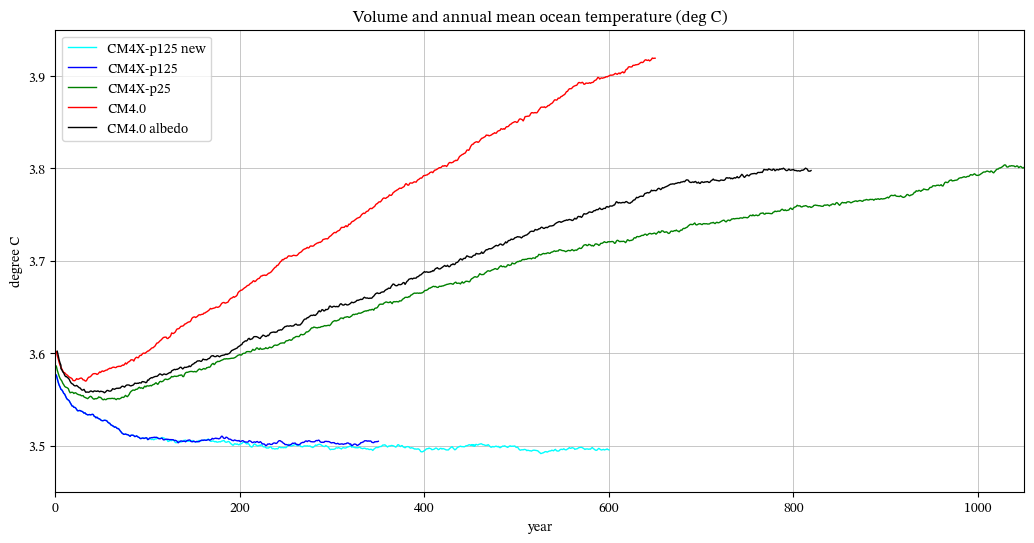

In [18]:
#fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(12.5,6.0))

thetaoga_209_313_437.plot.line(ax=axis, label='CM4X-p125 new',linestyle='solid', color='cyan', linewidth=1) 
#thetaoga_209_313.plot.line(ax=axis, label='CM4X-p125 new',linestyle='solid', color='cyan', linewidth=1) 
thetaoga_209.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_233.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_255.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_293.plot.line(ax=axis,                                    linestyle='solid', color='brown', linewidth=1) 

#thetaoga_210_230_306.plot.line(ax=axis, linestyle='solid', color='green', linewidth=1) 
thetaoga_210_230_306.plot.line(ax=axis, label='CM4X-p25',linestyle='solid', color='green', linewidth=1) 

thetaoga_001.plot.line(ax=axis, label='CM4.0',linestyle='solid', color='red', linewidth=1) 
thetaoga_425.plot.line(ax=axis, label='CM4.0 albedo',linestyle='solid', color='black', linewidth=1) 


#thetaoga_piC_p25.plot.line(ax=axis,linestyle='solid', color='green', linewidth=1) 
#thetaoga_231.plot.line(ax=axis, linestyle='solid', color='black', linewidth=1) 
#thetaoga_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 

#thetaoga_001.plot.line(ax=axis, label='CM4.0 piControl',linestyle='solid', color='red', linewidth=4) 
#thetaoga_002_003.plot.line(ax=axis, label='CM4.0 hist + SSP5-8.5', linestyle='solid', color='cyan', linewidth=4) 

#thetaoga_cm25.plot.line(ax=axis, label='CM2.5 piControl', linestyle='solid', color='cyan', linewidth=4) 
#thetaoga_cm26.plot.line(ax=axis, label='CM2.6 piControl', linestyle='solid', color='red', linewidth=4) 


axis.legend(loc='upper left')
axis.set_ylim([3.45,3.95])
#axis.set_ylim([3.5,3.52])
axis.set_xlim(0,1050)
#axis.set_xlim(100,150)

axis.set_ylabel('degree C')
axis.set_xlabel('year')

#axis.fill_between(thetaoga_209['year'].values, 0, thetaoga_209['year'].values,
#                  where=((thetaoga_209['year'] >= 1850) & (thetaoga_209['year'] <= 2014)),
#                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=.5)

#plt.xticks(ticks=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100])
#plt.xticks(ticks=[0, 50, 100, 150, 200])

plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
#fig.savefig('thetaoga_piControl_CM4X_both.jpg', bbox_inches='tight', dpi=400, format='jpeg')



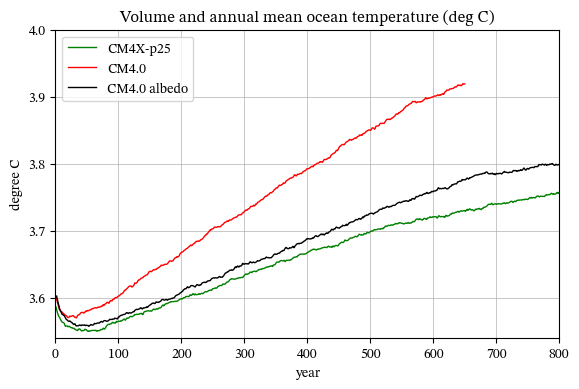

In [20]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))
#fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(12.5,6.0))

#thetaoga_209_313.plot.line(ax=axis, label='CM4X-p125 new',linestyle='solid', color='cyan', linewidth=1) 
#thetaoga_209.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_233.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_255.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_293.plot.line(ax=axis,                                    linestyle='solid', color='brown', linewidth=1) 

#thetaoga_210_230_306.plot.line(ax=axis, linestyle='solid', color='green', linewidth=1) 
thetaoga_210_230_306.plot.line(ax=axis, label='CM4X-p25',linestyle='solid', color='green', linewidth=1) 

thetaoga_001.plot.line(ax=axis, label='CM4.0',linestyle='solid', color='red', linewidth=1) 
thetaoga_425.plot.line(ax=axis, label='CM4.0 albedo',linestyle='solid', color='black', linewidth=1) 


#thetaoga_piC_p25.plot.line(ax=axis,linestyle='solid', color='green', linewidth=1) 
#thetaoga_231.plot.line(ax=axis, linestyle='solid', color='black', linewidth=1) 
#thetaoga_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 

#thetaoga_001.plot.line(ax=axis, label='CM4.0 piControl',linestyle='solid', color='red', linewidth=4) 
#thetaoga_002_003.plot.line(ax=axis, label='CM4.0 hist + SSP5-8.5', linestyle='solid', color='cyan', linewidth=4) 

#thetaoga_cm25.plot.line(ax=axis, label='CM2.5 piControl', linestyle='solid', color='cyan', linewidth=4) 
#thetaoga_cm26.plot.line(ax=axis, label='CM2.6 piControl', linestyle='solid', color='red', linewidth=4) 


axis.legend(loc='upper left')
axis.set_ylim([3.54,4.0])
#axis.set_ylim([3.5,3.52])
axis.set_xlim(0,800)
#axis.set_xlim(100,300)

axis.set_ylabel('degree C')
axis.set_xlabel('year')

#axis.fill_between(thetaoga_209['year'].values, 0, thetaoga_209['year'].values,
#                  where=((thetaoga_209['year'] >= 1850) & (thetaoga_209['year'] <= 2014)),
#                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=.5)

#plt.xticks(ticks=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100])
#plt.xticks(ticks=[0, 50, 100, 150, 200])

plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
fig.savefig('thetaoga_piControl_CM4X_CM4p0_albedo.jpg', bbox_inches='tight', dpi=400, format='jpeg')



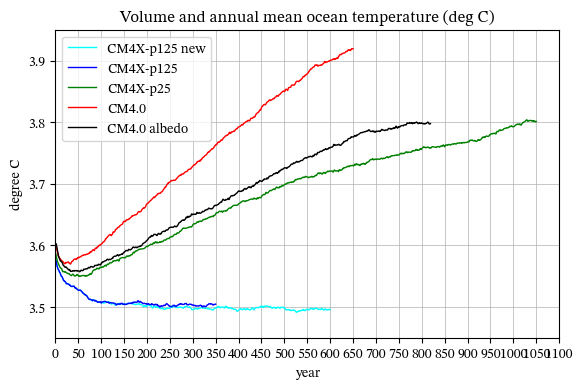

In [13]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

thetaoga_209_313_437.plot.line(ax=axis, label='CM4X-p125 new',linestyle='solid', color='cyan', linewidth=1) 
thetaoga_209.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_233.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_255.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_293.plot.line(ax=axis,                                    linestyle='solid', color='brown', linewidth=1) 

#thetaoga_210_230_306.plot.line(ax=axis, linestyle='solid', color='green', linewidth=1) 
thetaoga_210_230_306.plot.line(ax=axis, label='CM4X-p25',linestyle='solid', color='green', linewidth=1) 

thetaoga_001.plot.line(ax=axis, label='CM4.0',linestyle='solid', color='red', linewidth=1) 
thetaoga_425.plot.line(ax=axis, label='CM4.0 albedo',linestyle='solid', color='black', linewidth=1) 


#thetaoga_piC_p25.plot.line(ax=axis,linestyle='solid', color='green', linewidth=1) 
#thetaoga_231.plot.line(ax=axis, linestyle='solid', color='black', linewidth=1) 
#thetaoga_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 

#thetaoga_001.plot.line(ax=axis, label='CM4.0 piControl',linestyle='solid', color='red', linewidth=4) 
#thetaoga_002_003.plot.line(ax=axis, label='CM4.0 hist + SSP5-8.5', linestyle='solid', color='cyan', linewidth=4) 

#thetaoga_cm25.plot.line(ax=axis, label='CM2.5 piControl', linestyle='solid', color='cyan', linewidth=4) 
#thetaoga_cm26.plot.line(ax=axis, label='CM2.6 piControl', linestyle='solid', color='red', linewidth=4) 


axis.legend(loc='upper left')
axis.set_ylim([3.45,3.95])
#axis.set_ylim([3.5,3.52])
axis.set_xlim(0,800)
#axis.set_xlim(100,150)

axis.set_ylabel('degree C')
axis.set_xlabel('year')

#axis.fill_between(thetaoga_209['year'].values, 0, thetaoga_209['year'].values,
#                  where=((thetaoga_209['year'] >= 1850) & (thetaoga_209['year'] <= 2014)),
#                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=.5)

plt.xticks(ticks=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100])
#plt.xticks(ticks=[0, 50, 100, 150, 200])

plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
fig.savefig('thetaoga_piControl_CM4X_both.jpg', bbox_inches='tight', dpi=400, format='jpeg')



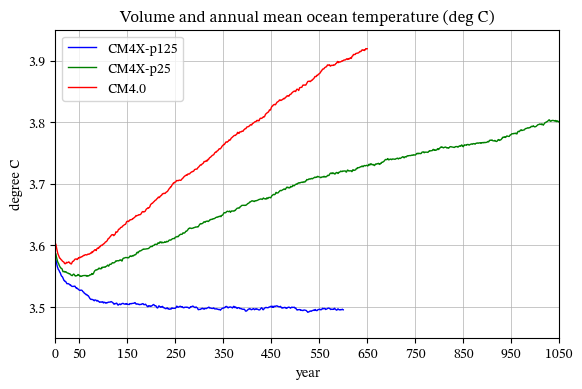

In [14]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

#thetaoga_present.plot.line(ax=axis, label='present day',linestyle='solid', color='0.8', linewidth=3) 

thetaoga_209_313_437.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_209.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_233.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_255.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_293.plot.line(ax=axis,                                    linestyle='solid', color='brown', linewidth=1) 

#thetaoga_210_230_306.plot.line(ax=axis, linestyle='solid', color='green', linewidth=1) 
thetaoga_210_230_306.plot.line(ax=axis, label='CM4X-p25',linestyle='solid', color='green', linewidth=1) 

thetaoga_001.plot.line(ax=axis, label='CM4.0',linestyle='solid', color='red', linewidth=1) 
#thetaoga_425.plot.line(ax=axis, label='CM4.0 albedo',linestyle='solid', color='black', linewidth=1) 

#thetaoga_piC_p25.plot.line(ax=axis,linestyle='solid', color='green', linewidth=1) 
#thetaoga_231.plot.line(ax=axis, linestyle='solid', color='black', linewidth=1) 
#thetaoga_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 

#thetaoga_001.plot.line(ax=axis, label='CM4.0 piControl',linestyle='solid', color='red', linewidth=4) 
#thetaoga_002_003.plot.line(ax=axis, label='CM4.0 hist + SSP5-8.5', linestyle='solid', color='cyan', linewidth=4) 

#thetaoga_cm25.plot.line(ax=axis, label='CM2.5 piControl', linestyle='solid', color='cyan', linewidth=4) 
#thetaoga_cm26.plot.line(ax=axis, label='CM2.6 piControl', linestyle='solid', color='red', linewidth=4) 


axis.legend(loc='upper left')
axis.set_ylim([3.45,3.95])
#axis.set_ylim([3.5,3.52])
axis.set_xlim(0,900)
#axis.set_xlim(100,150)

axis.set_ylabel('degree C')
axis.set_xlabel('year')

#axis.fill_between(thetaoga_209['year'].values, 0, thetaoga_209['year'].values,
#                  where=((thetaoga_209['year'] >= 1850) & (thetaoga_209['year'] <= 2014)),
#                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=.5)

plt.xticks(ticks=[0, 50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050])
#plt.xticks(ticks=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1050])
#plt.xticks(ticks=[0, 50, 100, 150, 200])

plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
fig.savefig('thetaoga_piControl_CM4X.jpg', bbox_inches='tight', dpi=400, format='jpeg')



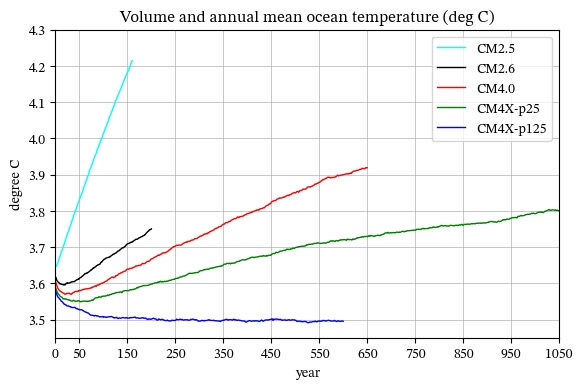

In [15]:
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(6.5,4.0))

thetaoga_cm25.plot.line(ax=axis, label='CM2.5', linestyle='solid', color='cyan', linewidth=1) 
thetaoga_cm26.plot.line(ax=axis, label='CM2.6', linestyle='solid', color='black', linewidth=1) 
thetaoga_001.plot.line(ax=axis, label='CM4.0',linestyle='solid', color='red', linewidth=1) 
thetaoga_210_230_306.plot.line(ax=axis, label='CM4X-p25',linestyle='solid', color='green', linewidth=1) 
#thetaoga_425.plot.line(ax=axis, label='CM4.0 albedo',linestyle='-.', color='red', linewidth=1) 

thetaoga_209_313_437.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_209.plot.line(ax=axis, label='CM4X-p125',linestyle='solid', color='blue', linewidth=1) 
#thetaoga_233.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_255.plot.line(ax=axis, label='CM4X-p125 hist + SSP5-8.5', linestyle='solid', color='brown', linewidth=1) 
#thetaoga_293.plot.line(ax=axis,                                    linestyle='solid', color='brown', linewidth=1) 

#thetaoga_210_230_306.plot.line(ax=axis, linestyle='solid', color='green', linewidth=1) 



#thetaoga_piC_p25.plot.line(ax=axis,linestyle='solid', color='green', linewidth=1) 
#thetaoga_231.plot.line(ax=axis, linestyle='solid', color='black', linewidth=1) 
#thetaoga_232.plot.line(ax=axis, label='CM4X-p25 hist + SSP5-8.5',linestyle='solid', color='black', linewidth=1) 

#thetaoga_001.plot.line(ax=axis, label='CM4.0 piControl',linestyle='solid', color='red', linewidth=4) 
#thetaoga_002_003.plot.line(ax=axis, label='CM4.0 hist + SSP5-8.5', linestyle='solid', color='cyan', linewidth=4) 



axis.legend(loc='upper right')
axis.set_ylim([3.45,4.3])
#axis.set_ylim([3.5,3.52])
axis.set_xlim(0,1000)
#axis.set_xlim(100,150)

axis.set_ylabel('degree C')
axis.set_xlabel('year')

#axis.fill_between(thetaoga_209['year'].values, 0, thetaoga_209['year'].values,
#                  where=((thetaoga_209['year'] >= 1850) & (thetaoga_209['year'] <= 2014)),
#                  interpolate=True, color='gray', alpha=0.1)


axis.grid(linewidth=.5)

plt.xticks(ticks=[0, 50, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050])
#plt.xticks(ticks=[0, 50, 100, 150, 200])

plt.vlines(x=-5.5e4,ymin=3.5,ymax=3.6, color= 'purple', linestyle='solid')
plt.vlines(x=3.7e3,ymin=3.5,ymax=3.8, color= 'purple', linestyle='solid')
axis.set_title('Volume and annual mean ocean temperature (deg C)')
fig.savefig('thetaoga_piControl_CM4X_CM20.jpg', bbox_inches='tight', dpi=400, format='jpeg')



In [16]:
# compute change in temp for p125
diff = thetaoga_209_313_437[150]-thetaoga_209_313_437[0]
heat = 1.3e18 * 4000 * 1035 * diff.values * 1e-21
print(diff.values,' ',heat)

-0.07213787190772569   -388.2460266073796


In [17]:
# compute change in temp over 1000 years for p25
diff = thetaoga_210_230_306[1000]-thetaoga_210_230_306[0]
heat = 1.3e18 * 4000 * 1035 * diff.values * 1e-21
print(diff.values,' ',heat)

0.20668975346038154   1112.4042531237733
